In [86]:
import numpy as np
import os
import pandas as pd
from glob import glob
from os.path import basename
from sklearn.model_selection import cross_val_score
from micromlgen import port
from sklearn.svm import SVC
from tqdm.notebook import tqdm

In [87]:
data_dir = "C:/Users/USER/Desktop/Gesture Data"

In [88]:
# # Load training data
# train_df = pd.read_csv("Train(static)_NoKal.csv")  
# # Load testing data
# test_df = pd.read_csv("New Data(concat)\Than_NoKal.csv")  

# # Separate features (X) and target variable (y) for training data
# X_train = train_df.drop(columns=['Gesture', 'Time'])
# y_train = train_df['Gesture']

# # Separate features (X) and target variable (y) for testing data
# X_test = test_df.drop(columns=['Gesture', 'Time'])
# y_test = test_df['Gesture']

# X = pd.concat([X_train, X_test])
# y = pd.concat([y_train, y_test])

In [89]:
# X = X_train
# y = y_train
# model = SVC(kernel='linear', gamma=0.001, probability=False)
# model.fit(X, y)
# print(port(model, classmap={
#     0: 'Backward',
#     1: 'Down',
#     2: 'Forward',
#     3: 'Left',
#     4: 'Right',
#     5: 'Up',
#  }))

In [90]:
root_dir = "C:/Users/USER/Desktop/Gesture Data/New Data(static)/"

In [91]:
folder_id = np.array(os.listdir("C:/Users/USER/Desktop/Gesture Data/New Data(static)"))
folder_id

array(['BB_NoKal.csv', 'Bhee_NoKal.csv', 'Bua_NoKal.csv',
       'Click_NoKal.csv', 'Earth_NoKal.csv', 'KM_NoKal.csv',
       'KP_NoKal.csv', 'Taew_NoKal.csv', 'Than_NoKal.csv'], dtype='<U15')

In [92]:
from sklearn.model_selection import ShuffleSplit
set_number = 0
fold = 5
ss = ShuffleSplit(n_splits=fold, test_size=0.25, random_state=0)
train_ids = []
test_ids = []

for train_index, test_index in ss.split(folder_id):
    train_id = [folder_id[i] for i in train_index]
    test_id = [folder_id[i] for i in test_index]
    train_ids.append(train_id)
    test_ids.append(test_id)
    print(f"SET {set_number} ")
    print(f"train set --> {[folder_id[i] for i in train_index]}")
    print(f"test set --> {[folder_id[i] for i in test_index]}")
    set_number += 1


SET 0 
train set --> ['Earth_NoKal.csv', 'Than_NoKal.csv', 'KP_NoKal.csv', 'Click_NoKal.csv', 'BB_NoKal.csv', 'KM_NoKal.csv']
test set --> ['Taew_NoKal.csv', 'Bua_NoKal.csv', 'Bhee_NoKal.csv']
SET 1 
train set --> ['KP_NoKal.csv', 'Than_NoKal.csv', 'BB_NoKal.csv', 'Earth_NoKal.csv', 'Bua_NoKal.csv', 'KM_NoKal.csv']
test set --> ['Click_NoKal.csv', 'Bhee_NoKal.csv', 'Taew_NoKal.csv']
SET 2 
train set --> ['Earth_NoKal.csv', 'Bhee_NoKal.csv', 'BB_NoKal.csv', 'Than_NoKal.csv', 'Taew_NoKal.csv', 'KP_NoKal.csv']
test set --> ['KM_NoKal.csv', 'Bua_NoKal.csv', 'Click_NoKal.csv']
SET 3 
train set --> ['KM_NoKal.csv', 'BB_NoKal.csv', 'Click_NoKal.csv', 'Earth_NoKal.csv', 'Bhee_NoKal.csv', 'Than_NoKal.csv']
test set --> ['Bua_NoKal.csv', 'KP_NoKal.csv', 'Taew_NoKal.csv']
SET 4 
train set --> ['KP_NoKal.csv', 'Bhee_NoKal.csv', 'Than_NoKal.csv', 'Click_NoKal.csv', 'Bua_NoKal.csv', 'BB_NoKal.csv']
test set --> ['KM_NoKal.csv', 'Taew_NoKal.csv', 'Earth_NoKal.csv']


In [93]:
os.makedirs("data_fold", exist_ok=True)
save = True
for i in tqdm(range(fold)):
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    for filename in train_ids[i]:
        train_df_temp = pd.read_csv(root_dir + filename)
        train_df = pd.concat([train_df, train_df_temp])
    
    for filename in test_ids[i]:
        test_df_temp = pd.read_csv(root_dir + filename)
        test_df = pd.concat([test_df, test_df_temp])
    if save == True:    
        train_df.to_csv(f"data_fold/train_fold_{i}.csv")
        test_df.to_csv(f"data_fold/test_fold_{i}.csv")

  0%|          | 0/5 [00:00<?, ?it/s]

In [94]:
os.listdir("data_fold")

['test_fold_0.csv',
 'test_fold_1.csv',
 'test_fold_2.csv',
 'test_fold_3.csv',
 'test_fold_4.csv',
 'train_fold_0.csv',
 'train_fold_1.csv',
 'train_fold_2.csv',
 'train_fold_3.csv',
 'train_fold_4.csv']

In [95]:
train_df = pd.read_csv("data_fold/train_fold_1.csv")
test_df = pd.read_csv("data_fold/test_fold_1.csv")
print(train_df.shape, test_df.shape)

(72000, 15) (36000, 15)


In [96]:
X = train_df.drop(columns=['Gesture', 'Time', "Unnamed: 0"])
y = train_df['Gesture']
model = SVC(kernel='linear', gamma=0.001, probability=False, verbose=True)
model.fit(X, y)

[LibSVM]

SVC(gamma=0.001, kernel='linear', verbose=True)

In [97]:
# Evaluate the model on the testing data
X_test = test_df.drop(columns=['Gesture', 'Time', "Unnamed: 0"])
y_test = test_df['Gesture']
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9444444444444444


In [98]:
print(port(model, classmap={
    0: 'Backward',
    1: 'Down',
    2: 'Forward',
    3: 'Left',
    4: 'Right',
    5: 'Up',
 }))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[72] = { 0 };
                        float decisions[15] = { 0 };
                        int votes[6] = { 0 };
                        kernels[0] = compute_kernel(x,   14.55  , -3.62  , -7.15  , 14.27  , 4.55  , -5.92  , 18.71  , 0.17  , -4.6  , 17.5  , -1.26  , -6.8 );
                        kernels[1] = compute_kernel(x,   11.09  , -7.1  , -5.78  , 10.75  , 6.87  , -7.31  , 13.08  , -0.23  , -11.13  , 16.75  , -2.3  , -7.46 );
                        kernels[2] = compute_kernel(x,   12.83  , -2.72  , -9.63  , 11.87  , 0.87  , -9.58  , 14.23  , -3.83  , -9.43  , 14.08  , 1.02  , -10.66 );
                        kernels[3] = compute_kernel(x,   12.69  , -2.89

In [102]:
# # Evaluate the model on the testing data
# test_df = pd.read_csv("data_fold/test_fold_3.csv")
# X_test = test_df.drop(columns=['Gesture', 'Time', "Unnamed: 0"])
# y_test = test_df['Gesture']
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)

Accuracy: 1.0


In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9444444444444444
Confusion Matrix:
[[4000    0    0 2000    0    0]
 [   0 6000    0    0    0    0]
 [   0    0 6000    0    0    0]
 [   0    0    0 6000    0    0]
 [   0    0    0    0 6000    0]
 [   0    0    0    0    0 6000]]


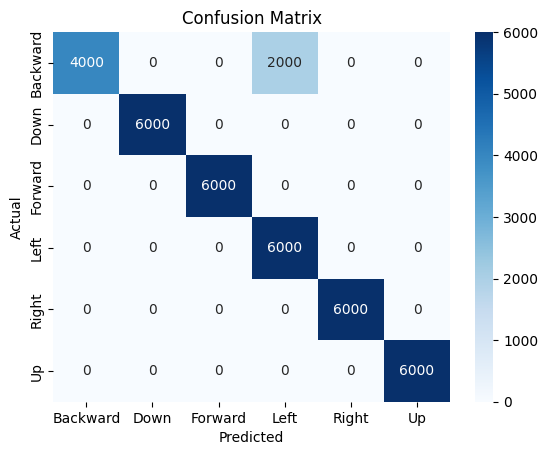

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique class labels
class_labels = sorted(set(y_test))

# Plot the confusion matrix with actual labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()